# **Full Credit Score Anlaysis of Bati Bank**

## **Overview**
This project provides a comprehensive analysis of credit risk using various methodologies, including 
1. **Exploratory Data Analysis** (EDA), 
2. **Feature Engineering**, 
3. **Default Estimation, and Weight of Evidence (WoE) binning**, 
4. **Culminating in the development of predictive models.**

# **Exploratory Data Analysis**

In [1]:
import logging
import pandas as pd
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data module
try:
    from data_loader import load_data
    logger_initialized = True
except ImportError as e:
    logger_initialized = False
    print(f"Error importing 'load_data': {e}")

# Set pandas display options for better visibility
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# Configure logging
def setup_logger(name: str = 'my_logger') -> logging.Logger:
    """
    Set up a logger with INFO level and StreamHandler.
    
    Parameters:
    -----------
    name : str
        The name of the logger.
    
    Returns:
    --------
    logging.Logger
        Configured logger instance.
    """
    logger = logging.getLogger(name)
    logger.setLevel(logging.INFO)
    
    # Prevent duplicate handlers
    if not logger.hasHandlers():
        handler = logging.StreamHandler()
        handler.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
    
    return logger

# Initialize logger
logger = setup_logger()
logger.info("Imported necessary libraries.")

# Check and log if 'load_data' was successfully imported
if logger_initialized:
    logger.info("'load_data' module imported successfully.")
else:
    logger.warning("'load_data' module could not be imported. Check the 'scripts' directory and file availability.")

2025-01-27 19:08:36,201 - INFO - Imported necessary libraries.
2025-01-27 19:08:36,202 - INFO - 'load_data' module imported successfully.


### **Data Loading**

In [3]:
logger.info("🟢 Starting the data loading process...")
df = load_data('../data/data.csv')
if not df.empty:
    logger.info(f"✅ Data loaded successfully! The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
else:
    logger.warning("⚠️ Data loading completed, but the dataset is empty.")

2025-01-27 19:08:57,422 - INFO - 🟢 Starting the data loading process...
2025-01-27 19:08:57,668 - INFO - ✅ Data loaded successfully! The dataset contains 95662 rows and 15 columns.


Data successfully loaded from '../data/data.csv' with 95662 rows and 15 columns.


In [4]:
# Import the class CreditRiskAnalysisEDA
from eda_analysis import CreditRiskAnalysis

# Initialize the class
cr_eda = CreditRiskAnalysis(df)

# Logging activity
logger.info("🟢 Data overview initiated.")

2025-01-27 19:09:10,514 - INFO - 🟢 Data overview initiated.


### **Overview of the dataset**

In [5]:
# Overview of the dataset
if not df.empty:
    cr_eda.data_overview()

logger.info("✅ Data overview successfully completed.")

            Data Overview           
Number of Rows: 95662
Number of Columns: 15

Column Data Types:
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First Five Rows:


,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


2025-01-27 19:09:30,277 - INFO - ✅ Data overview successfully completed.



Missing Values Overview:
Series([], dtype: int64)


#### **Summary**

The dataset contains a total of **95,662 transactions** with **15 attributes**, including:

- **Categorical Identifiers**: 
  - BatchId
  - AccountId
  - CustomerId

- **Financial Metrics**: 
  - Amount
  - Value

- **Timestamps**: 
  - TransactionStartTime

There are **no missing values** in the dataset, indicating completeness in the collected information.


In [6]:
# Convert the 'TransactionStartTime' column to a datetime format for better handling of date and time data
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Print the first five rows to confirm the conversion and check the updated DataFrame
print("Updated 'TransactionStartTime' column:")
print(df[['TransactionStartTime']].head())

Updated 'TransactionStartTime' column:
                         TransactionStartTime
TransactionId                                
TransactionId_76871 2018-11-15 02:18:49+00:00
TransactionId_73770 2018-11-15 02:19:08+00:00
TransactionId_26203 2018-11-15 02:44:21+00:00
TransactionId_380   2018-11-15 03:32:55+00:00
TransactionId_28195 2018-11-15 03:34:21+00:00


### **Statistics Summary**

In [7]:
# Log the start of the summary statistics process
logger.info("🟢 Generating summary statistics for numeric columns...")   
print("================================================================================")

# Generate statistical summary for numeric columns
summary_stats = cr_eda.summary_statistics()

# Display the transposed summary statistics for better readability
print("================================================================================")
print("Summary statistics generated:")
display(summary_stats.T)


# Log the completion of the summary statistics generation
print("================================================================================")
logger.info("✅ Summary statistics generation completed.")

2025-01-27 19:10:13,810 - INFO - 🟢 Generating summary statistics for numeric columns...


Summary Statistics:
                    count         mean            std        min    25%  \
Statistic                                                                
CountryCode      95662.0   256.000000       0.000000      256.0  256.0   
Amount           95662.0  6717.846433  123306.797164 -1000000.0  -50.0   
Value            95662.0  9900.583941  123122.087776        2.0  275.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0    2.0   
FraudResult      95662.0     0.002018       0.044872        0.0    0.0   

                    50%     75%        max  median    mode   skewness  \
Statistic                                                               
CountryCode       256.0   256.0      256.0   256.0   256.0   0.000000   
Amount           1000.0  2800.0  9880000.0  1000.0  1000.0  51.098490   
Value            1000.0  5000.0  9880000.0  1000.0  1000.0  51.291086   
PricingStrategy     2.0     2.0        4.0     2.0     2.0   1.659057   
FraudResult         0.

Statistic,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000
median,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
mode,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000


2025-01-27 19:10:13,890 - INFO - ✅ Summary statistics generation completed.


#### **Summary Statistics**

**General Information**
- **Total Entries**: 95,662

**Attributes**

**Country Code**
- **Mean**: 256.0
- **Standard Deviation**: 0.0
- **Min/Max**: 256.0 / 256.0
- **Skewness**: 0.0
- **Kurtosis**: 0.0
- **IQR**: 0.0

**Amount**
- **Mean**: 6,717.85
- **Standard Deviation**: 123,306.80
- **Min/Max**: -1,000,000.0 / 9,880,000.0
- **Skewness**: 51.10 (highly right-skewed)
- **Kurtosis**: 3,363.13 (heavy-tailed)
- **IQR**: 2,850.0

**Value**
- **Mean**: 9,900.58
- **Standard Deviation**: 123,122.09
- **Min/Max**: 2.0 / 9,880,000.0
- **Skewness**: 51.29 (highly right-skewed)
- **Kurtosis**: 3,378.07 (heavy-tailed)
- **IQR**: 4,725.0

**Pricing Strategy**
- **Mean**: 2.26
- **Standard Deviation**: 0.73
- **Min/Max**: 0.0 / 4.0
- **Skewness**: 1.66 (right-skewed)
- **Kurtosis**: 2.09 (relatively normal)
- **IQR**: 0.0

**Fraud Result**
- **Mean**: 0.002
- **Standard Deviation**: 0.045
- **Min/Max**: 0.0 / 1.0
- **Skewness**: 22.20 (very right-skewed)
- **Kurtosis**: 490.69 (highly peaked)
- **IQR**: 0.0

#### **Key Observations**
- The **Country Code** shows no variability across entries.
- The **Amount** and **Value** fields exhibit significant right skewness and presence of outliers.
- **Pricing Strategy** is relatively normally distributed.
- The **Fraud Result** indicates a majority of transactions are non-fraudulent.

#### **Conclusion**
The dataset presents a diverse range of financial transactions, with some attributes requiring further investigation into their distribution characteristics.

### **Distribution of Numerical Features**

2025-01-27 19:10:52,217 - INFO - 🟢 Starting to plot numerical distribution...
2025-01-27 19:10:52,223 - INFO - Identified numeric columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


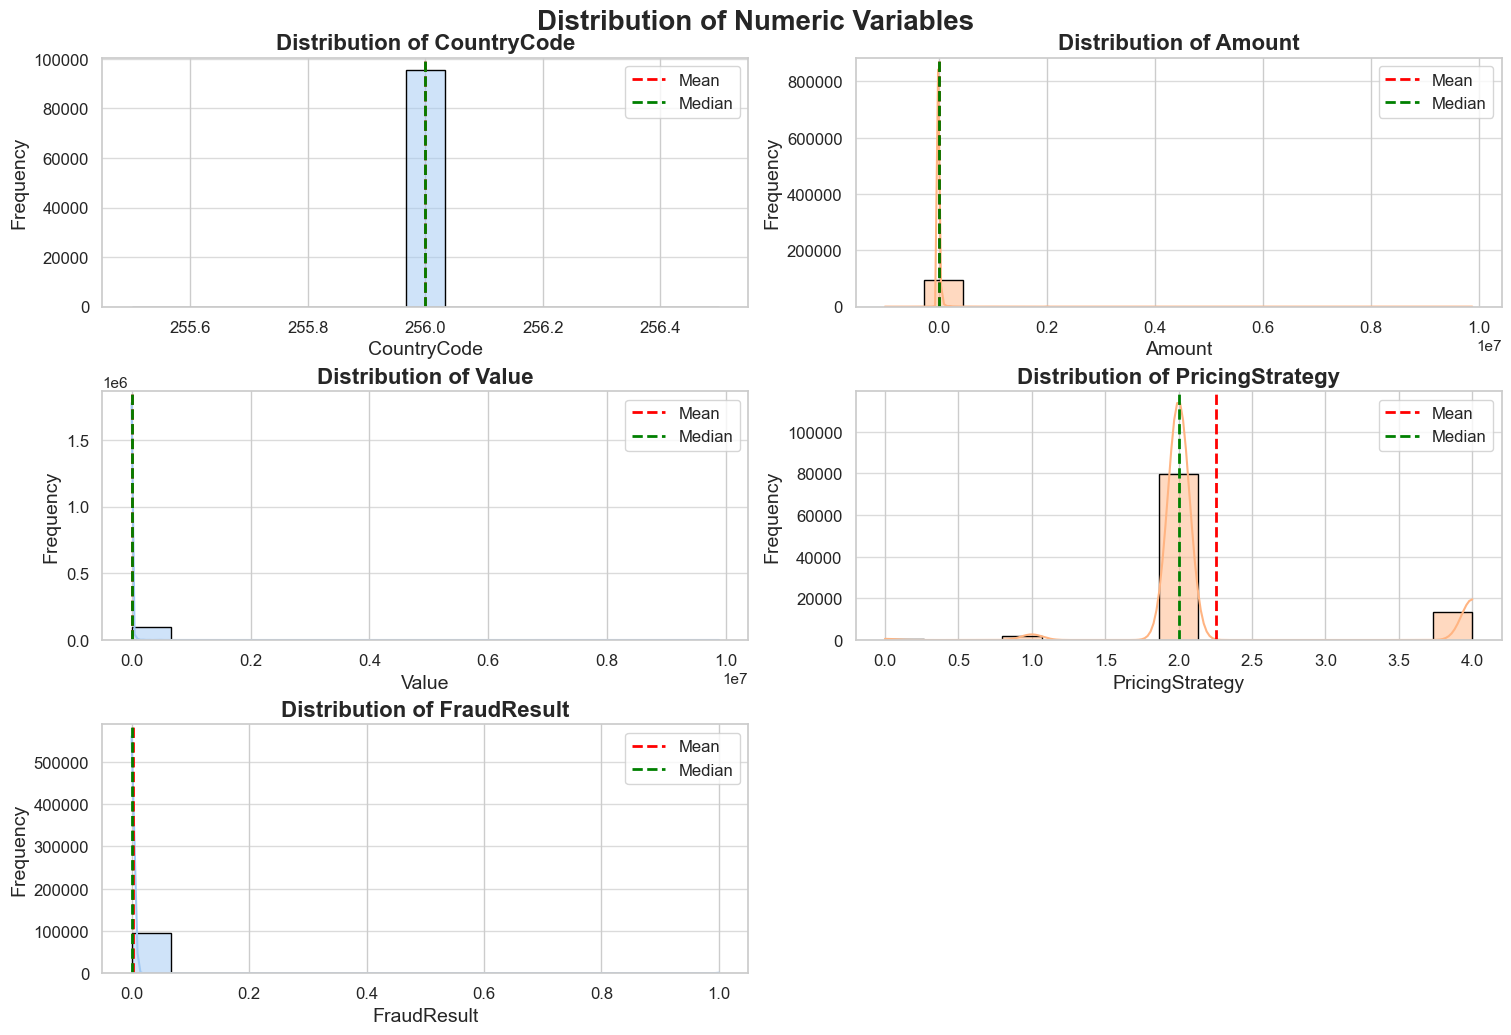

2025-01-27 19:10:54,303 - INFO - ✅ The distribution plot has been successfully completed.


In [8]:
# Logger activity
logger.info("🟢 Starting to plot numerical distribution...")
print("============================================================================================================================")

# List of numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
logger.info(f"Identified numeric columns: {numeric_cols}")

# Plot distribution
cr_eda.plot_numerical_distribution(numeric_cols)

logger.info("✅ The distribution plot has been successfully completed.")

#### **Key Insights**

- **Right-Skewness in Numerical Features**: 
  Most numerical features display right-skewness, indicating the presence of a few extreme values that significantly influence the mean, pulling it to the right.

- **Prominent Peaks in Key Variables**: 
  The distributions of `CountryCode`, `Amount`, and `Value` exhibit distinct peaks, suggesting the existence of common values or ranges that are frequently encountered.

- **Preferred Pricing Strategy**: 
  The `PricingStrategy` distribution reveals a notable peak at a value of 2, indicating a strong preference for this particular pricing strategy among transactions.

- **Majority of Non-Fraudulent Transactions**: 
  The `FraudResult` distribution indicates that the majority of transactions are non-fraudulent, highlighting a low incidence of fraud within the dataset.

### **Skewness**

2025-01-27 19:11:34,140 - INFO - 🟢 Starting the visualization of skewness for numerical features...


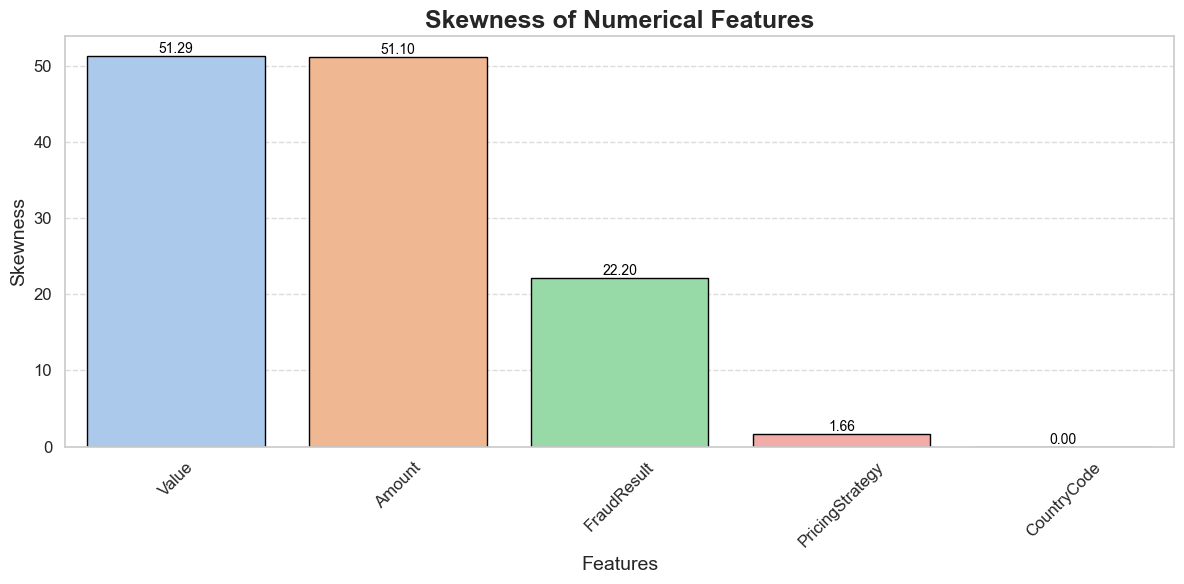

2025-01-27 19:11:34,290 - INFO - ✅ Skewness visualization completed successfully.
2025-01-27 19:11:34,291 - INFO - All visualization processes have been completed.


In [9]:
# Logger activity
logger.info("🟢 Starting the visualization of skewness for numerical features...")
print("============================================================================================================================")

if not df.empty:
    cr_eda.plot_skewness()
    
    logger.info("✅ Skewness visualization completed successfully.")
else:
    logger.warning("The DataFrame is empty. No numerical features to visualize.")

logger.info("All visualization processes have been completed.")

#### **Insights**

- **CountryCode**: 
  This feature remains constant (256) across all entries, indicating that the data pertains to a single geographical region. Due to the lack of variability in this feature, it will not contribute to model performance and can be considered for removal in subsequent analyses.

- **Amount**: 
  The distribution of the transaction amount is highly right-skewed with extreme outliers, indicated by a skewness value of over 51. This suggests that a few transactions have significantly higher amounts than the rest. Such skewness can distort the model's learning process, making normalization or transformation (e.g., log transformation) necessary to handle these extreme values.

- **Value**: 
  The absolute value of transactions shows a similar pattern to Amount, with a high degree of skewness. The presence of large outliers implies that these transactions have a disproportionate effect on the overall data. Addressing this skewness through appropriate scaling will help balance the data for better model performance.

- **PricingStrategy**: 
  The data shows a preference for a specific pricing strategy (category 2), which dominates the distribution. This could indicate a business preference or customer inclination toward that pricing strategy. However, there is less skewness here, suggesting that the distribution is more balanced compared to other features.

- **FraudResult**: 
  Fraudulent transactions are extremely rare, as evidenced by the mean close to zero and the right-skewness of over 22. This class imbalance may lead to model bias toward predicting non-fraudulent transactions. Addressing this imbalance through techniques like oversampling the fraud cases or employing specialized algorithms may be required to ensure the model effectively captures fraudulent behavior.

### **Distribution of Categorical Features**